# Australia 'Data' Salary EDA and Data Prep

In [1]:
# import necessary packages
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
import seaborn as sns

style.use('ggplot')

%matplotlib inline

In [2]:
# read in the data that has been scraped and cleaned
salary = pd.read_csv('./datasets/salary.csv')

In [3]:
salary.shape

(14427, 7)

In [4]:
salary.head(2)

,Unnamed: 0,title,classification,summary,state,salary_bracket,salary_high
0,0,Category Data Assistant,Administration & Office Support,About Us TerryWhite Chemmart (TWCM) is Austral...,VIC,60,0
1,1,Data Administrator,Information & Communication Technology,About the business and the role This could be...,NSW,60,0


In [5]:
# drop ['Unnamed: 0'] columns
salary.drop(columns = ['Unnamed: 0'], inplace=True)

In [6]:
salary.tail(2)

,title,classification,summary,state,salary_bracket,salary_high
14425,Instructional Designer - Digital Literacy Trai...,Human Resources & Recruitment,Bluefin are working with a Federal government ...,NSW,250,1
14426,Frontend Team Lead,Information & Communication Technology,We are on the lookout for an experienced and p...,NSW,250,1


In [7]:
salary.isnull().sum()

title             0
classification    0
summary           1
state             1
salary_bracket    0
salary_high       0
dtype: int64

In [8]:
salary[salary.state.isnull()]

,title,classification,summary,state,salary_bracket,salary_high
3765,Design Engineer,Engineering,We are currently looking to recruit an experie...,NaN,80,0


In [9]:
salary.dropna(inplace=True)

Create and compare at least two models for each section. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing (e.g. Ridge, logistic regression, KNN, SVM, etc).

Section 1: Job Salary Trends
Section 2: Job Category Factors

## Exploratory Data Aanalysis (EDA)
* Inspection using various graphs

In [10]:
salary_bracket_count = salary['salary_bracket'].value_counts()
salary_bracket_count

60     3614
80     2621
100    2590
120    2044
150    1790
200    1330
250     436
Name: salary_bracket, dtype: int64

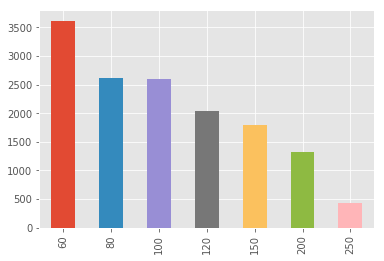

In [11]:
salary_bracket_count.plot(kind='bar')

The graph above show more jobs are advertised 100K and under than those above 100K

The graph below show 
> that there 8825 jobs advertised 100K and under
> that there 5600 jobs advertised 100K and over


In [12]:
salary_high_count = salary['salary_high'].value_counts()
salary_high_count

0    8825
1    5600
Name: salary_high, dtype: int64

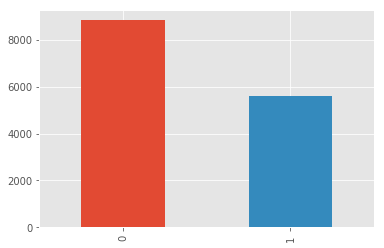

In [13]:
salary_high_count.plot(kind='bar')

In [14]:
classification_count = salary['classification'].value_counts()
classification_count

Information & Communication Technology    4129
Administration & Office Support           1618
Accounting                                1248
Marketing & Communications                 720
Manufacturing, Transport & Logistics       607
Sales                                      600
Banking & Financial Services               510
Government & Defence                       485
Healthcare & Medical                       474
Engineering                                469
Mining, Resources & Energy                 422
Call Centre & Customer Service             405
Trades & Services                          390
Human Resources & Recruitment              378
Education & Training                       306
Construction                               230
Community Services & Development           196
Science & Technology                       192
Retail & Consumer Products                 186
Consulting & Strategy                      179
Real Estate & Property                     136
Insurance & S

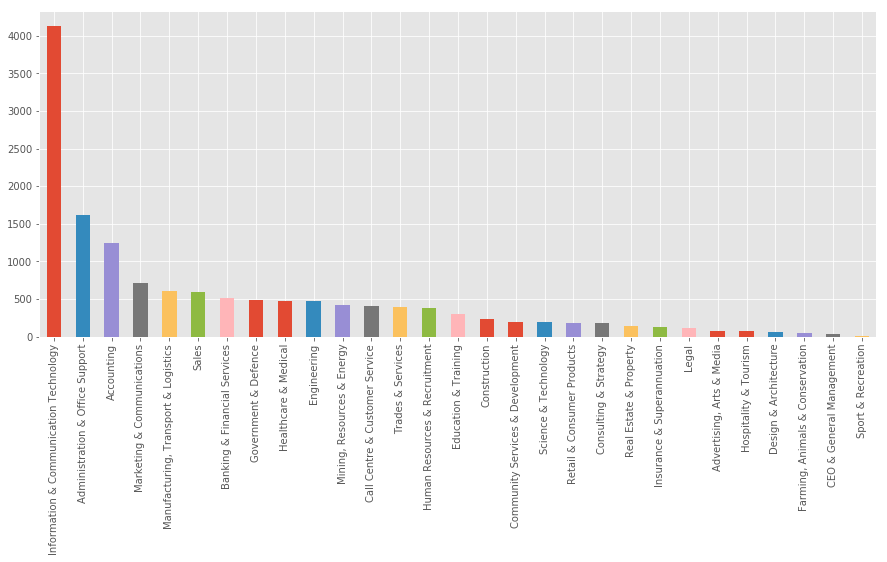

In [15]:
#salary['classification'].value_counts().plot(kind='bar', figsize=(15, 6))
classification_count.plot(kind='bar', figsize=(15, 6))

In [16]:
job_mean_by_category = salary.groupby(['classification'])['salary_bracket'].mean()
job_mean_by_category

classification
Accounting                                 94.863782
Administration & Office Support            66.440049
Advertising, Arts & Media                  98.205128
Banking & Financial Services              117.294118
CEO & General Management                  186.842105
Call Centre & Customer Service             70.024691
Community Services & Development           80.459184
Construction                              117.347826
Consulting & Strategy                     119.050279
Design & Architecture                     118.032787
Education & Training                       98.039216
Engineering                               119.253731
Farming, Animals & Conservation            82.978723
Government & Defence                      106.391753
Healthcare & Medical                       93.396624
Hospitality & Tourism                      68.142857
Human Resources & Recruitment             105.026455
Information & Communication Technology    142.659240
Insurance & Superannuation     

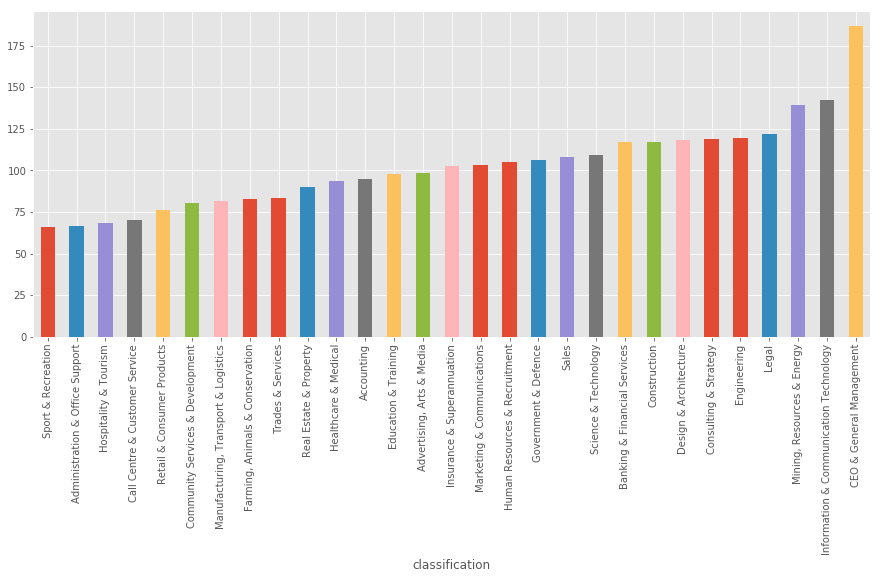

In [17]:
#salary.groupby(['classification'])['salary_bracket'].mean()
job_mean_by_category.sort_values().plot(kind='bar', figsize=(15, 6))

In [18]:
# see based on for each job classification , how many are fallened into which groups
job_count_by_category = salary.groupby(['classification','salary_bracket'])['salary_bracket'].count()
job_count_by_category

classification                   salary_bracket
Accounting                       60                 356
                                 80                 320
                                 100                244
                                 120                169
                                 150                113
                                 200                 34
                                 250                 12
Administration & Office Support  60                1238
                                 80                 293
                                 100                 65
                                 120                  9
                                 150                 10
                                 200                  1
                                 250                  2
Advertising, Arts & Media        60                  16
                                 80                  25
                                 100                 20


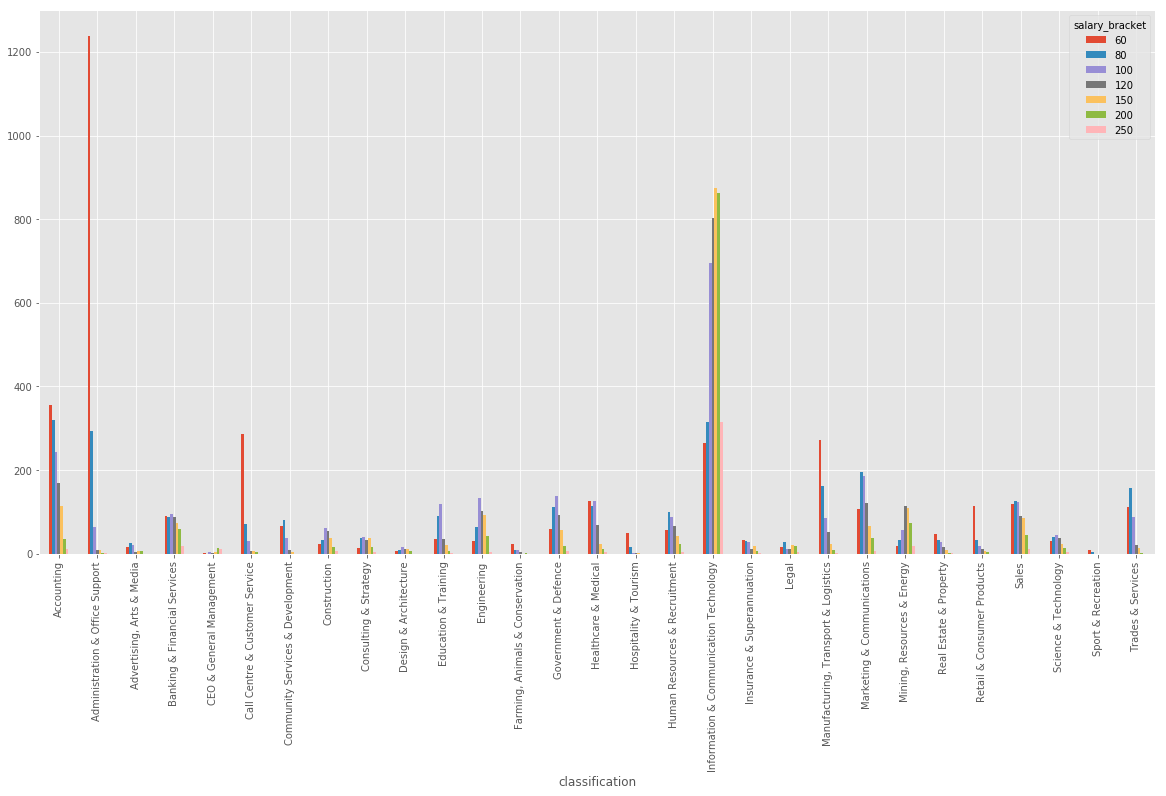

In [19]:
#salary.groupby(['classification','salary_bracket'])['salary_bracket'].count()
job_count_by_category.unstack().plot(kind = 'bar', figsize=(20, 10))

# Observevation based on graphs above and below related to DATA:

### Lowest Group in demand
    * 47     Farming, Animals & Conservation
    * 38     CEO & General Management
    * 13     Sport & Recreation

### Highest Group in demand
    * 4129     Information & Communication Technology
    * 1618     Administration & Office Support
    * 1248     Accounting


### Lowest paid group by mean
    * 68.14K   Hospitality & Tourism
    * 66.44K   Administration & Office Support
    * 66.15K   Sport & Recreation


### Highest paid group by mean
    * 186.84K   CEO & General Management                  
    * 142.65K   Information & Communication Technology    
    * 139.07K   Mining, Resources & Energy                

In [20]:
job_by_state = salary.groupby(['state'])[['salary_bracket']].count()
job_by_state

,salary_bracket
state,
ACT,527
NSW,6179
NT,72
QLD,2204
SA,464
TAS,56
VIC,3822
WA,1101


In [21]:
job_by_state_mean = salary.groupby(['state'])[['salary_bracket']].mean()
job_by_state_mean

,salary_bracket
state,
ACT,125.502846
NSW,113.528079
NT,106.388889
QLD,106.361162
SA,90.948276
TAS,79.285714
VIC,104.623234
WA,107.247956


In [22]:
statedf = job_by_state.merge(job_by_state_mean, on='state')
statedf.columns=['jobs_advertised', 'salary_mean']
statedf

,jobs_advertised,salary_mean
state,,
ACT,527,125.502846
NSW,6179,113.528079
NT,72,106.388889
QLD,2204,106.361162
SA,464,90.948276
TAS,56,79.285714
VIC,3822,104.623234
WA,1101,107.247956


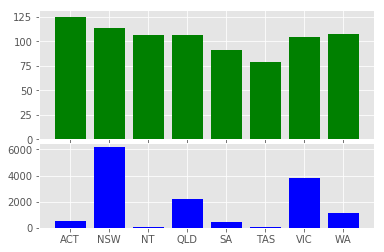

In [23]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan=6)
ax2 = plt.subplot2grid((10,1), (6,0), rowspan=4, sharex=ax1)

#ax1.plot(statedf.index, statedf['salary_mean'])
ax1.bar(statedf.index, statedf['salary_mean'], color='green')
ax2.bar(statedf.index, statedf['jobs_advertised'], color='blue')

#ax1.legend('salary mean')
#ax2.legend('number of jobs advertised')
plt.show()


* ACT seem to have highest paid but not as many jobs advertised
* NSW has the highest job listing, followed by VIC
* TAS seem to have lowest mean salary

In [24]:
job_state_by_cat = salary.groupby(['state','salary_bracket'])['salary_bracket'].count()
job_state_by_cat

state  salary_bracket
ACT    60                  99
       80                  73
       100                 92
       120                 78
       150                 57
       200                 95
       250                 33
NSW    60                1327
       80                1092
       100               1089
       120                933
       150                872
       200                673
       250                193
NT     60                  24
       80                  13
       100                 15
       120                  4
       150                  5
       200                  6
       250                  5
QLD    60                 668
       80                 430
       100                329
       120                267
       150                230
       200                190
       250                 90
SA     60                 186
       80                  97
       100                 60
       120                 69
       150        

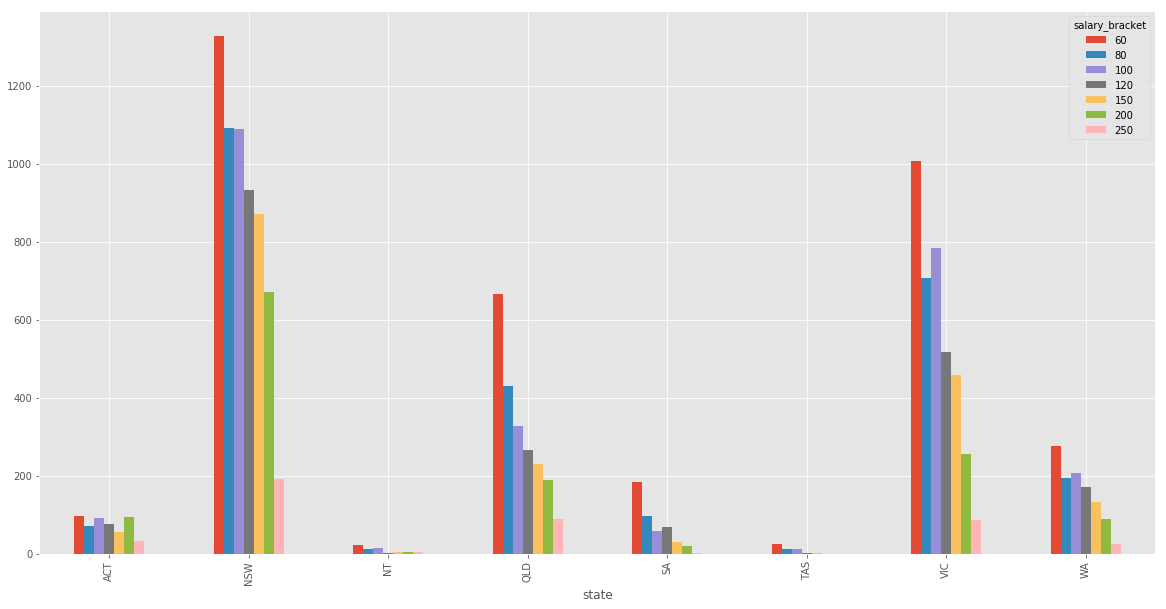

In [25]:
# see based on for each job classification , how many are fallened into which state
job_state_by_cat.unstack().plot(kind = 'bar', figsize=(20, 10))

In [26]:
# see based on for each job classification , how many are fallened into which groups
job_state_by_category = salary.groupby(['state','classification','salary_bracket'])['salary_bracket'].count()
job_state_by_category

state  classification                    salary_bracket
ACT    Accounting                        60                11
                                         80                 6
                                         100                5
                                         120                6
                                         150                2
       Administration & Office Support   60                20
                                         80                11
                                         100                5
                                         120                1
                                         150                2
       Banking & Financial Services      60                 1
                                         80                 2
                                         120                2
                                         150                1
                                         250                1
       CEO & G

C:\Users\tzechiang\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


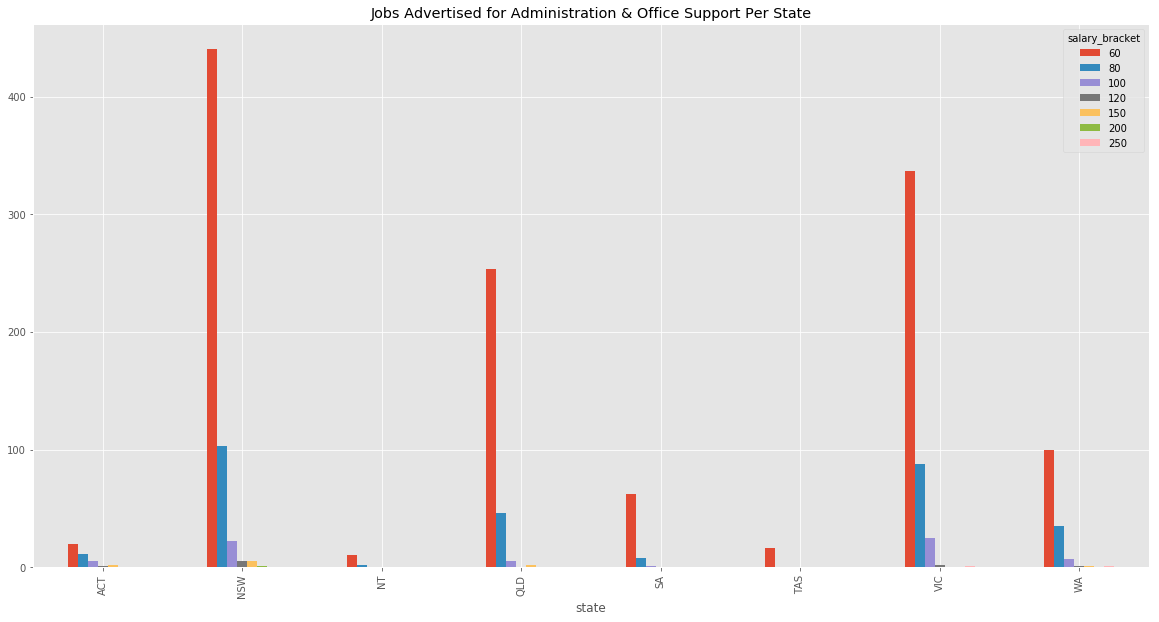

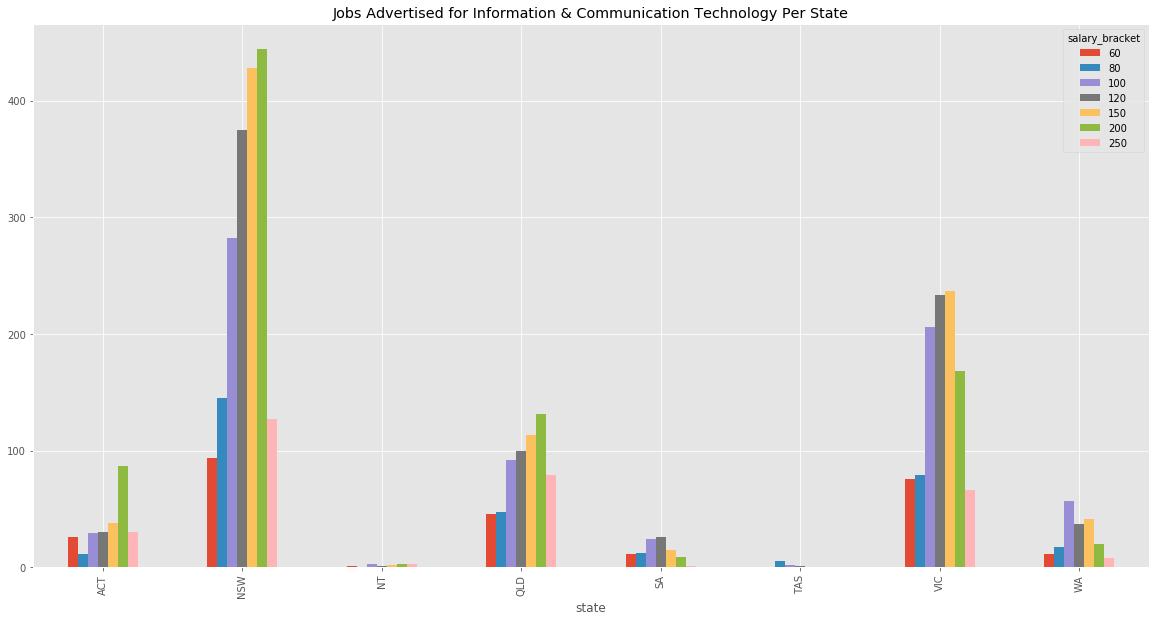

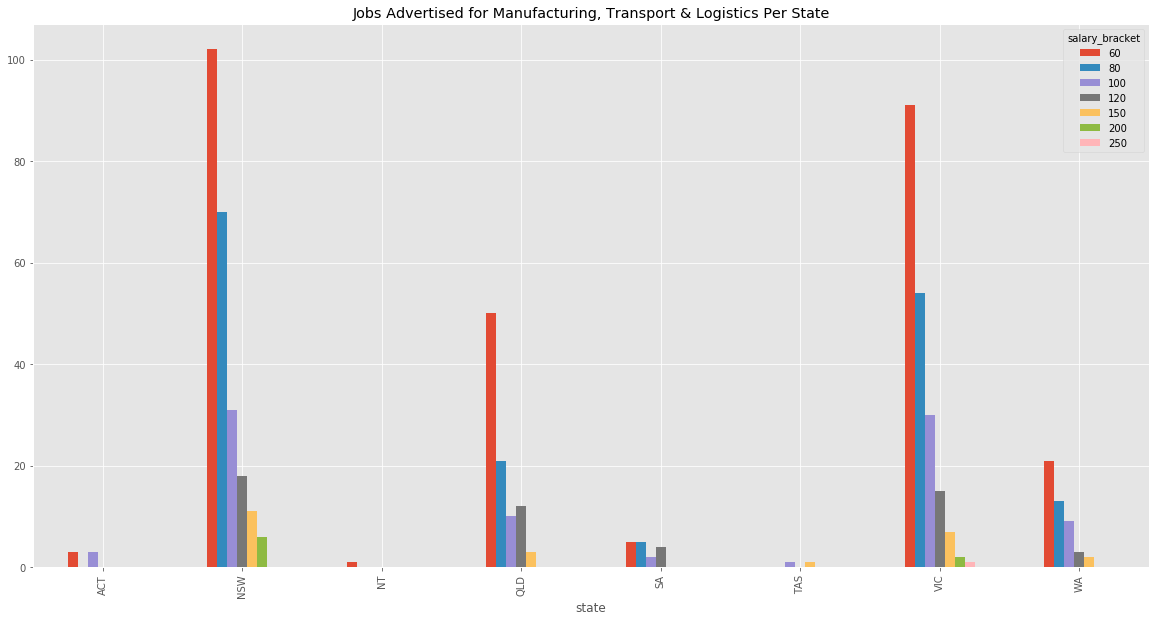

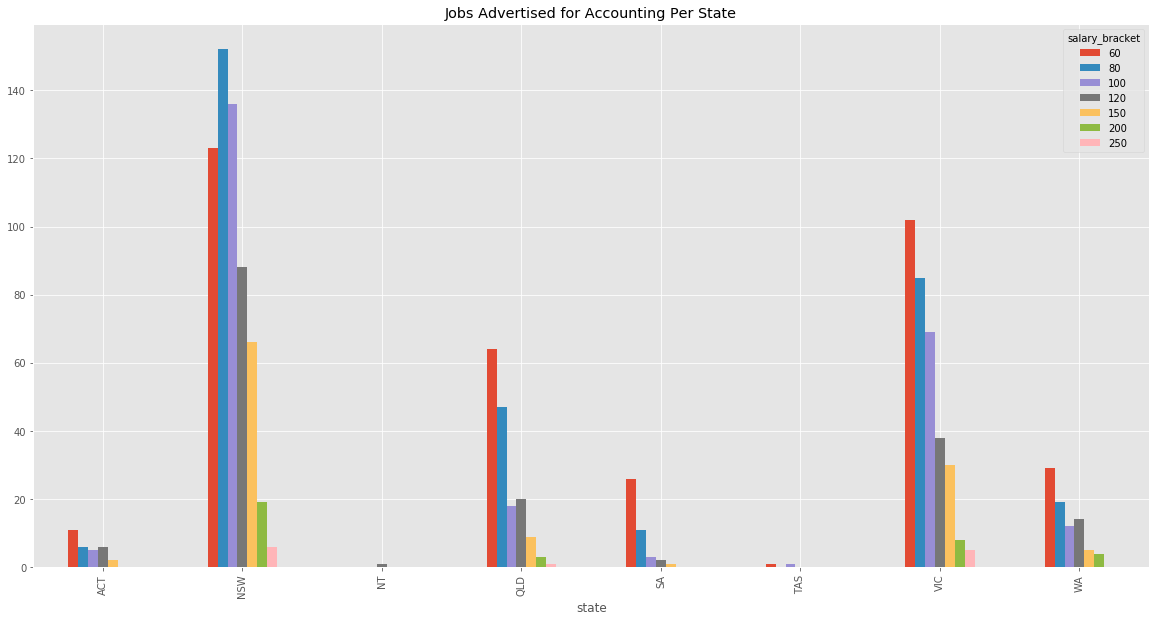

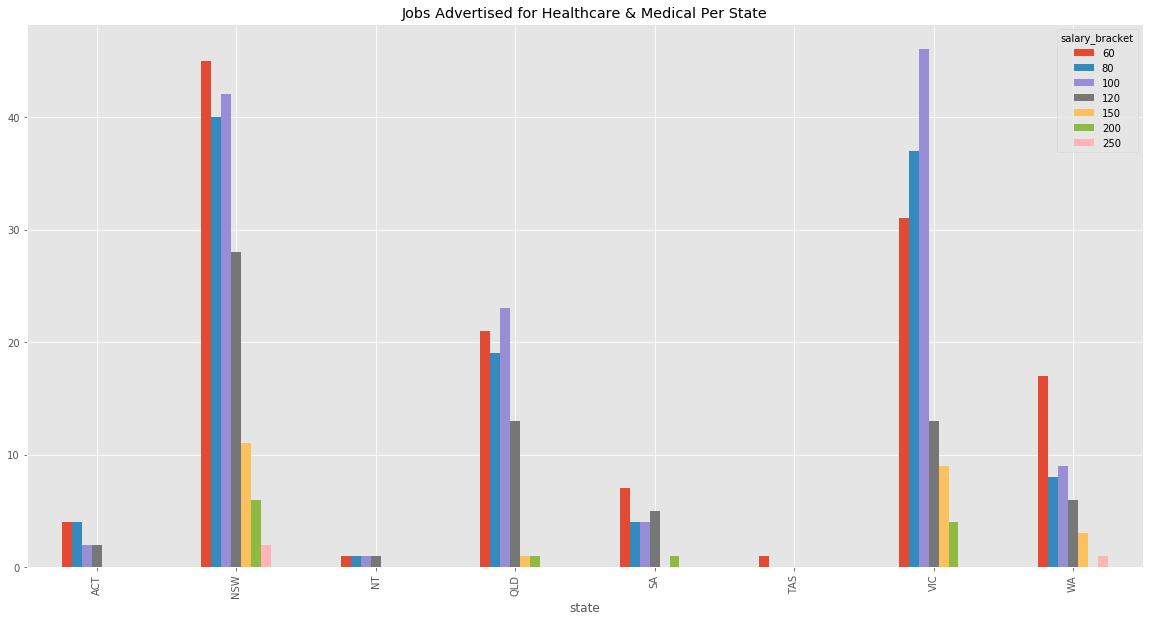

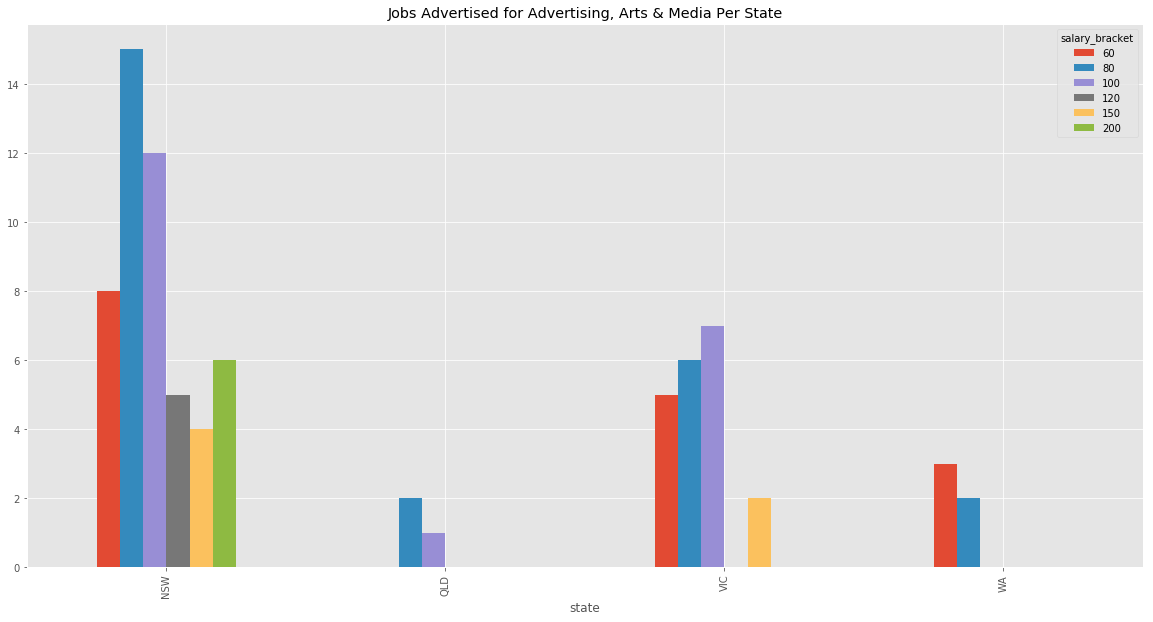

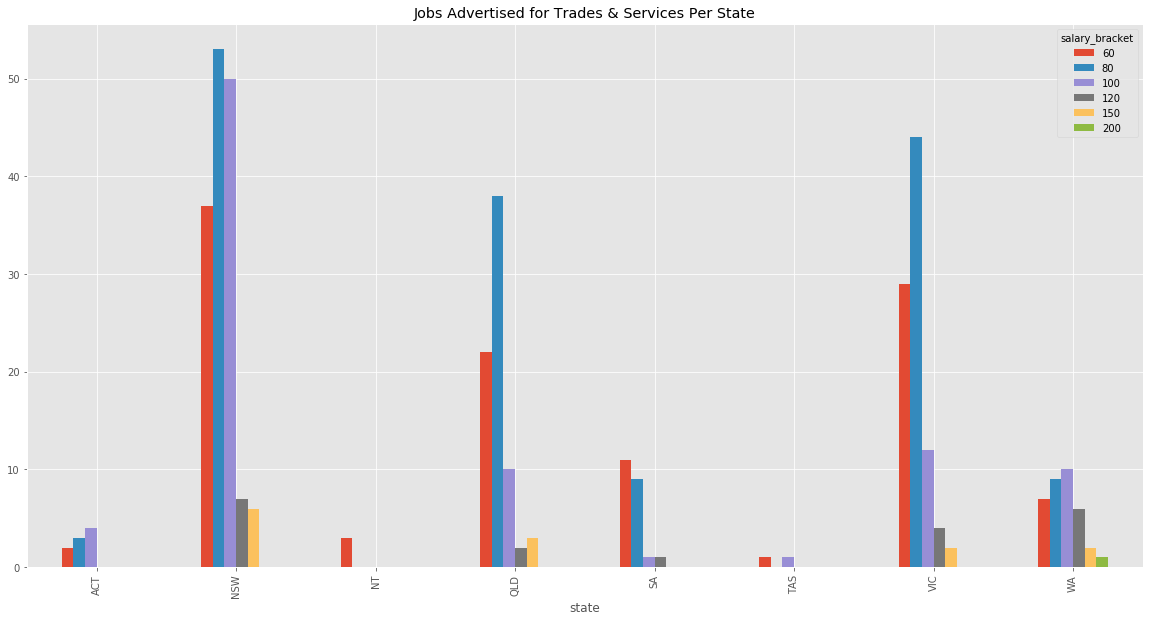

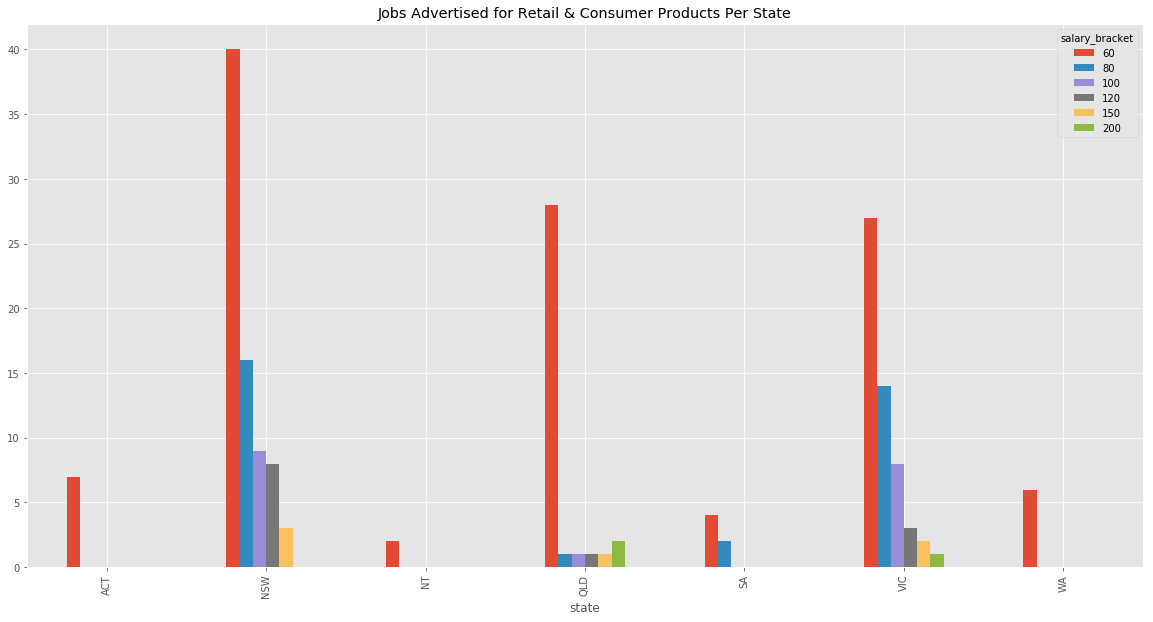

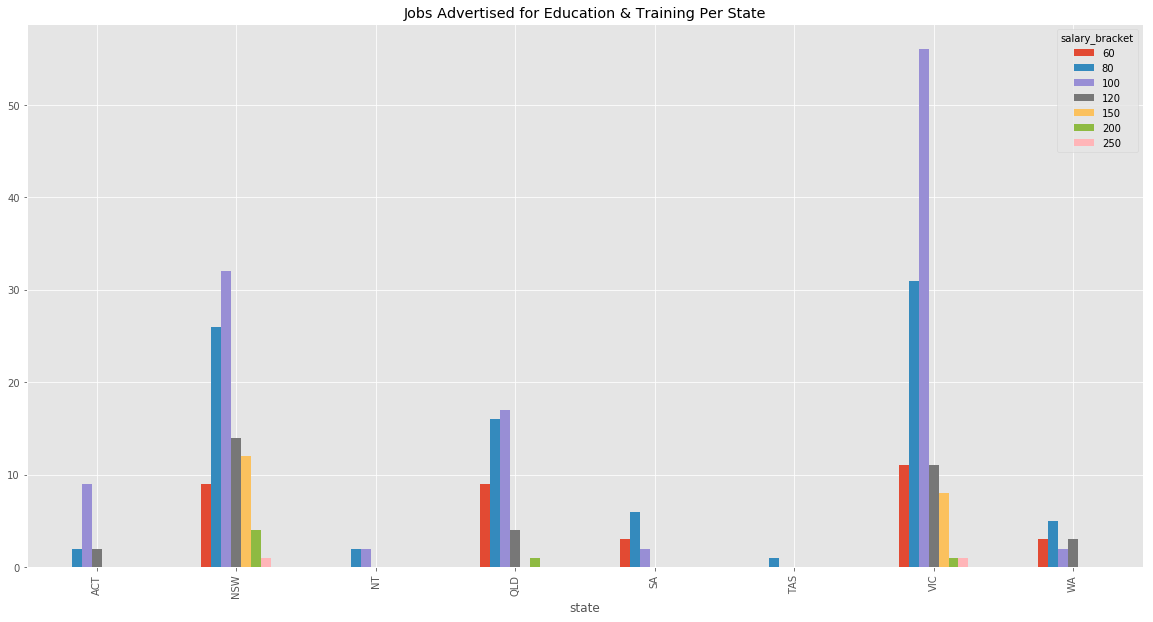

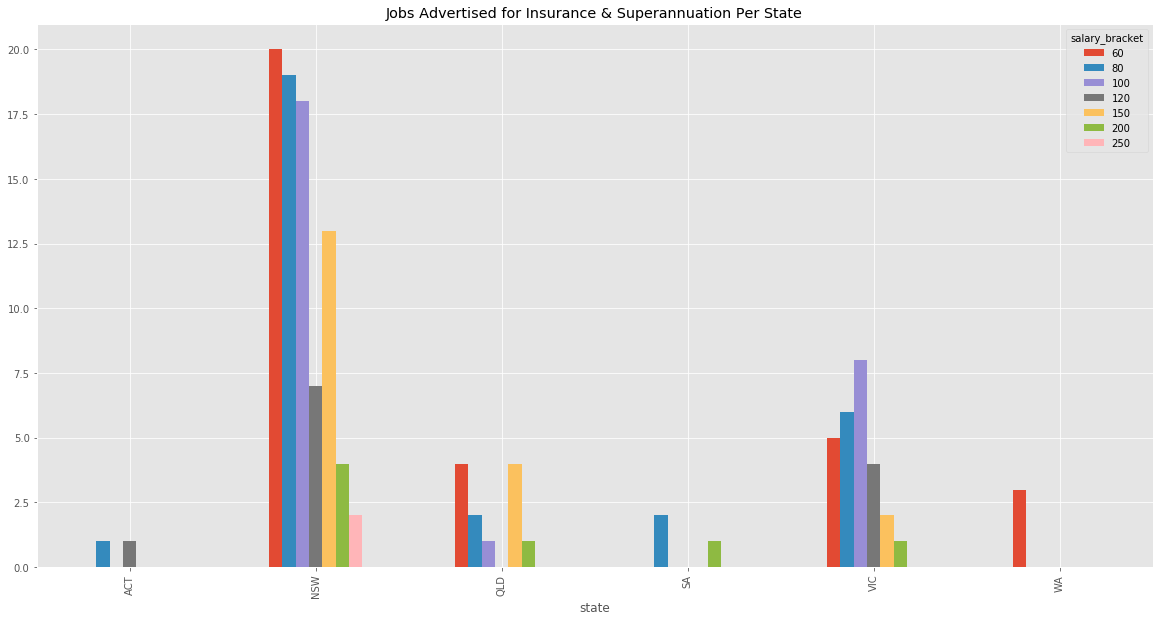

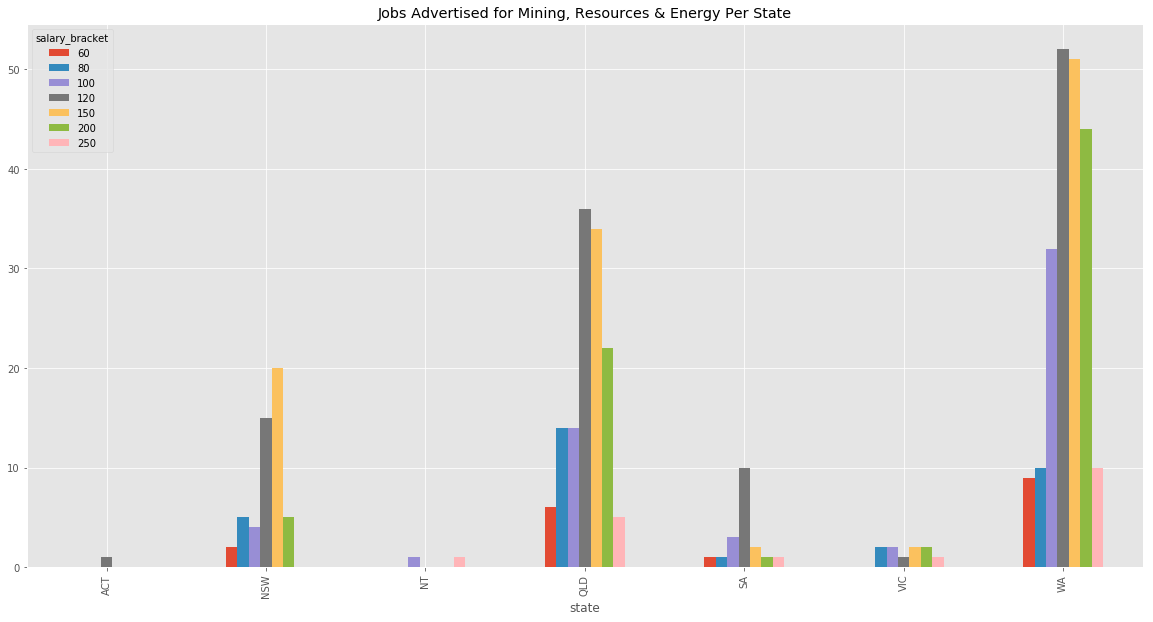

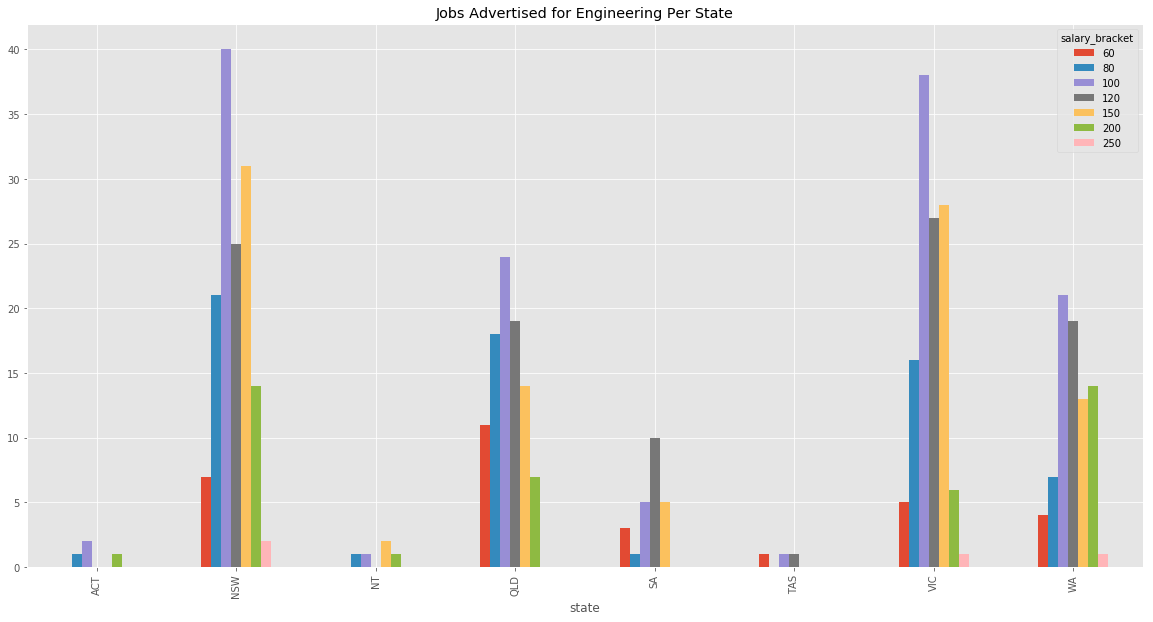

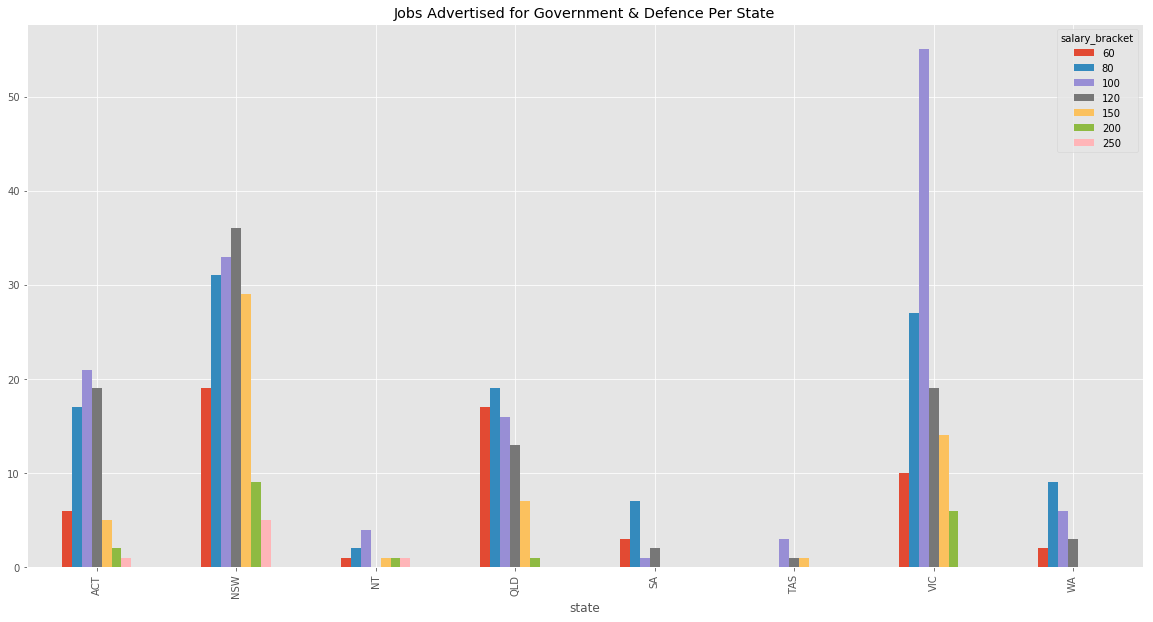

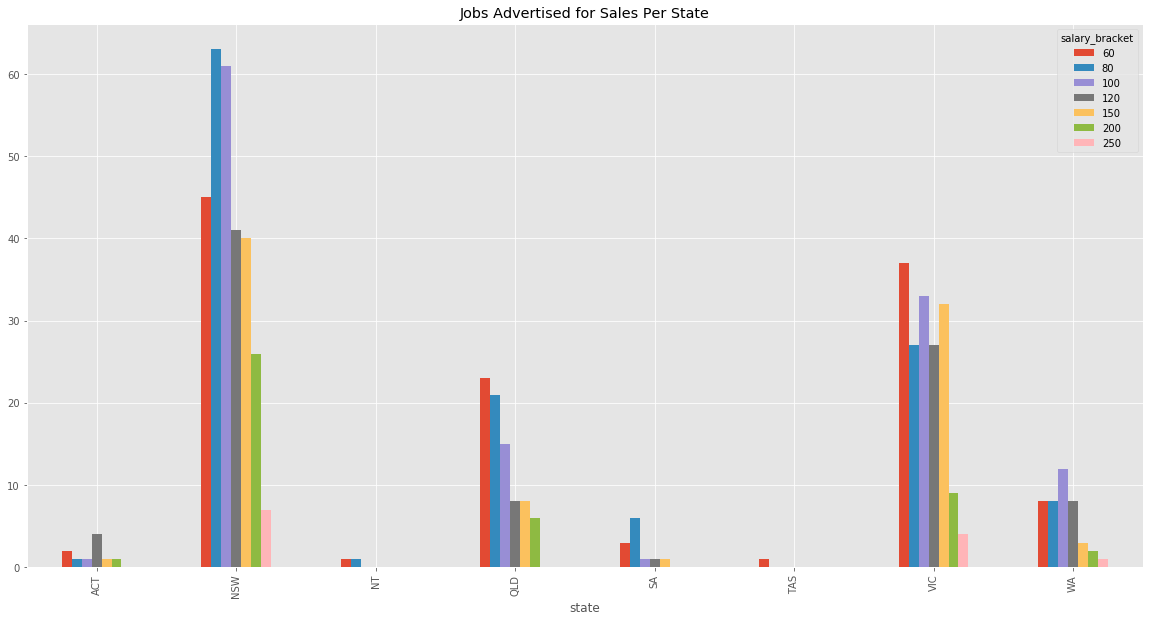

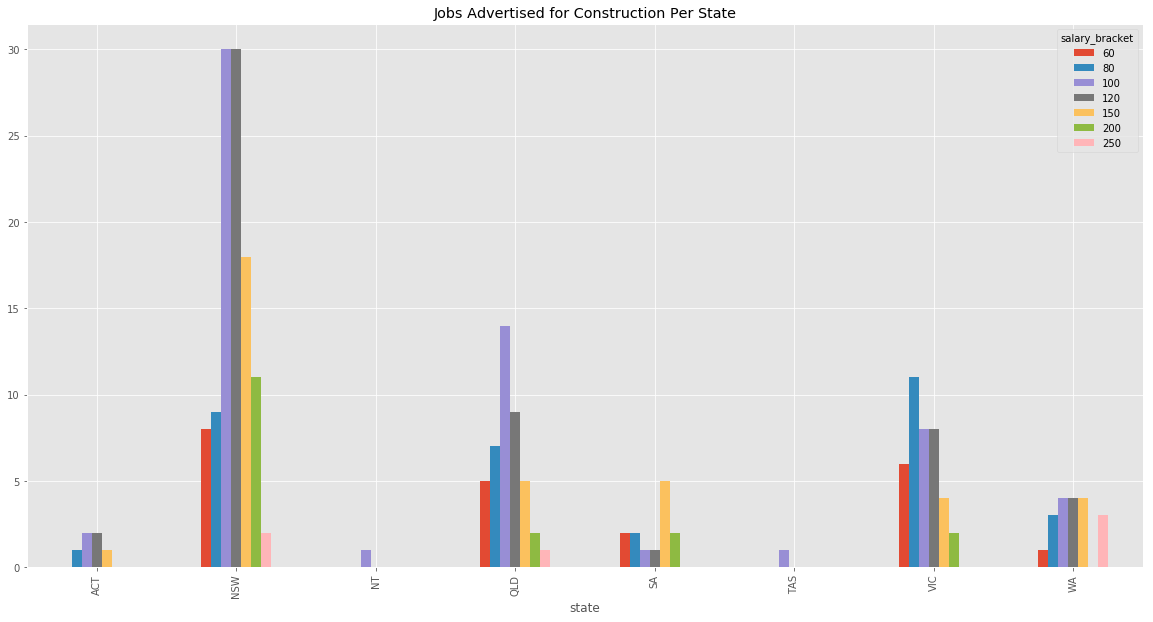

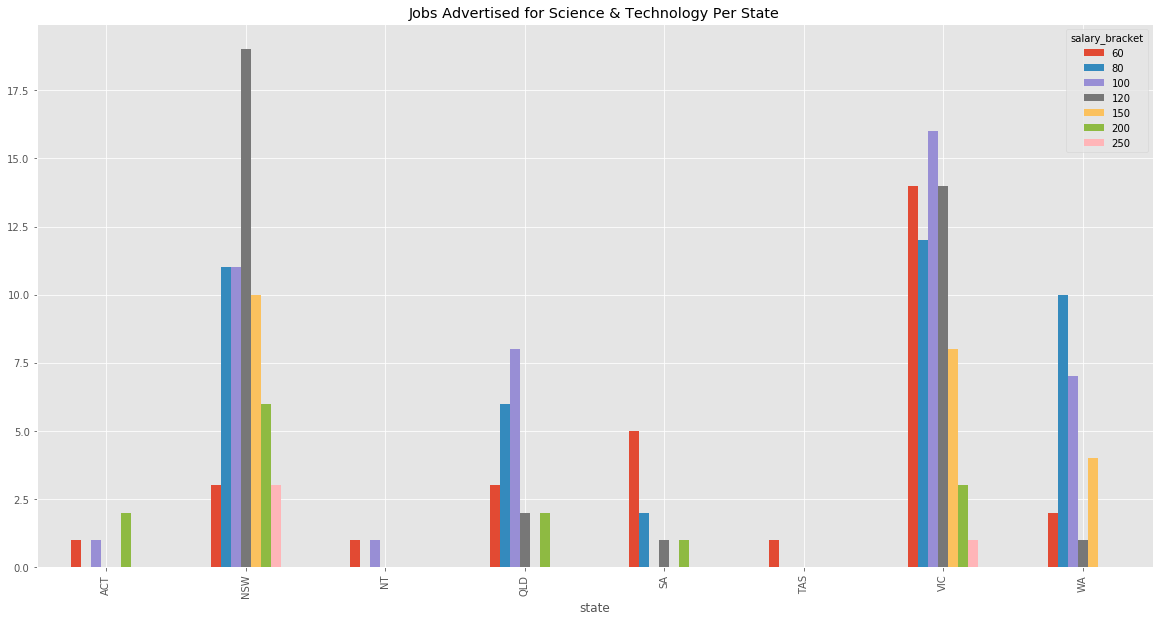

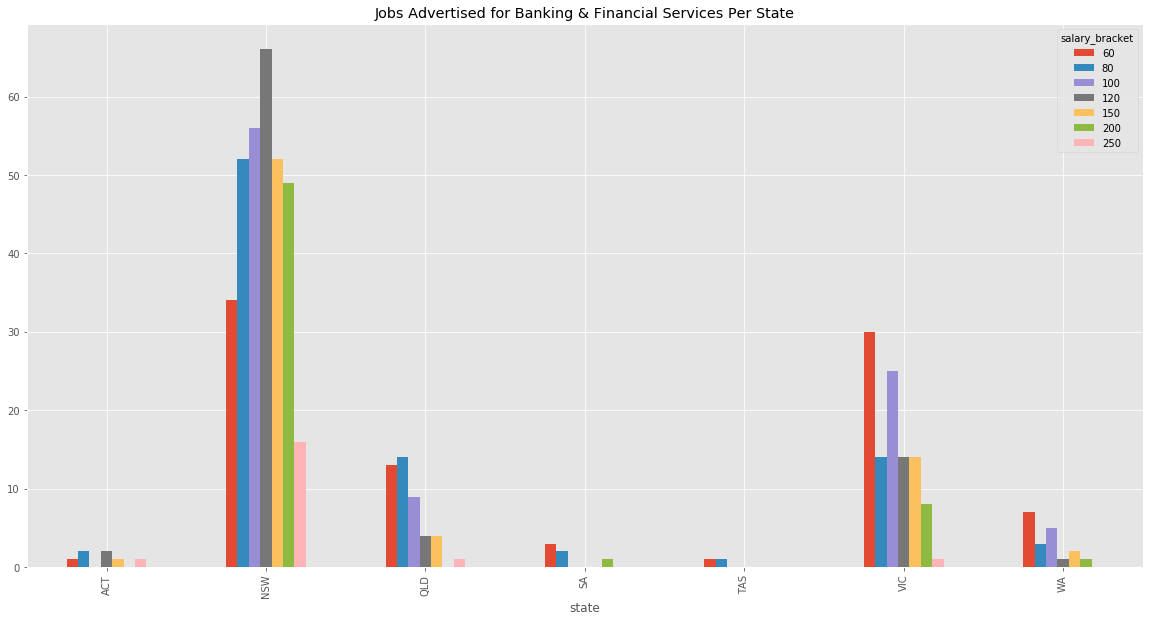

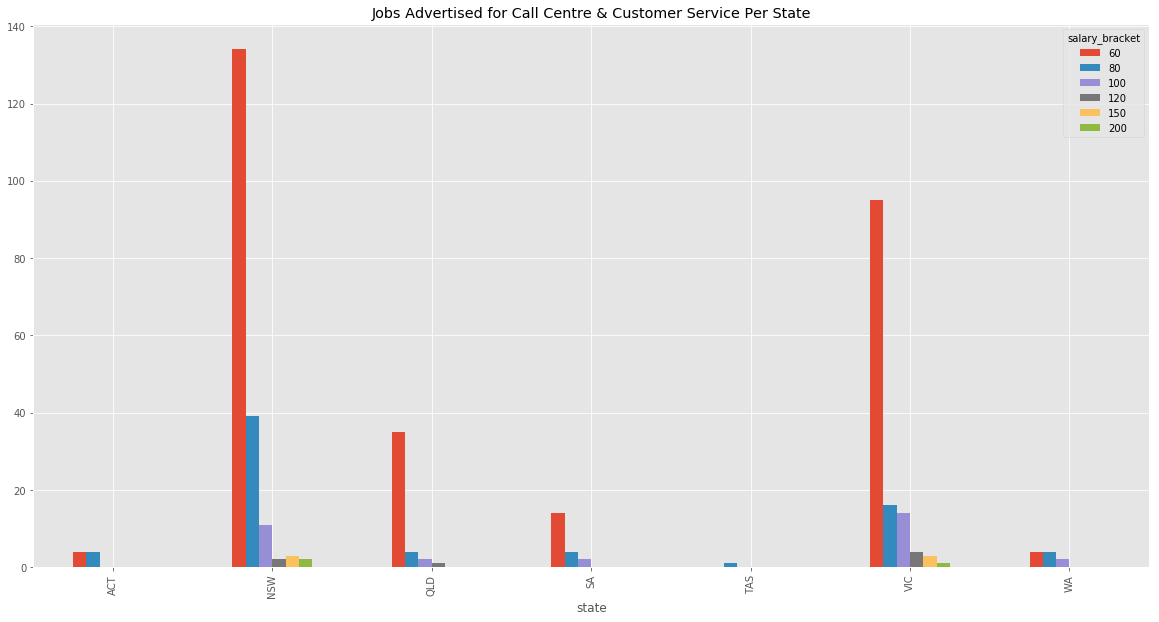

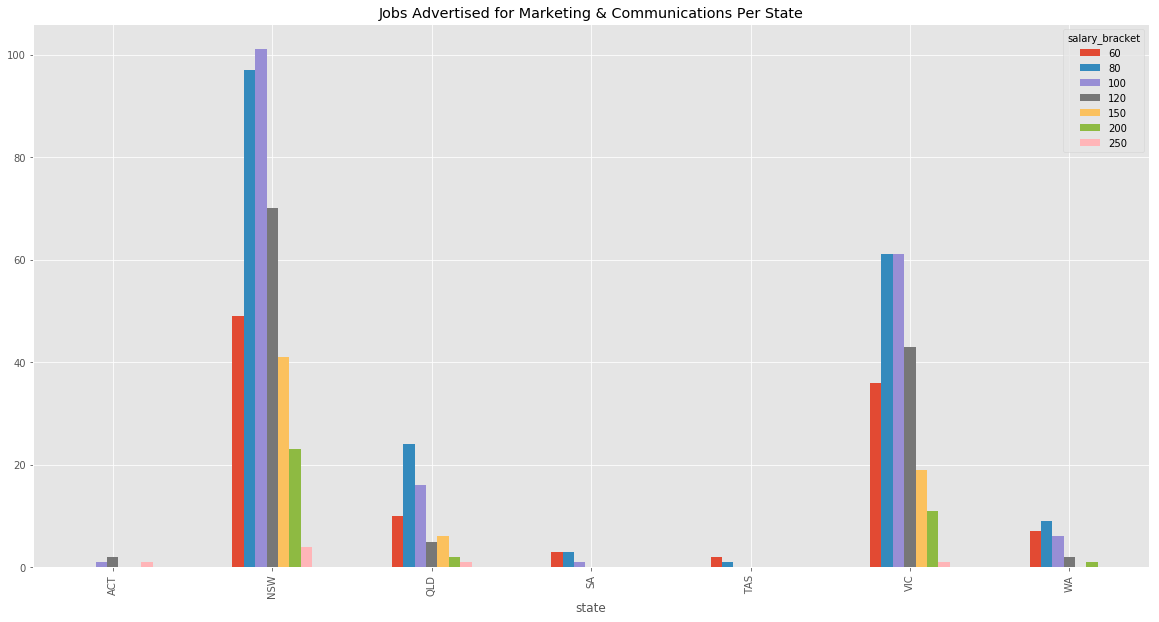

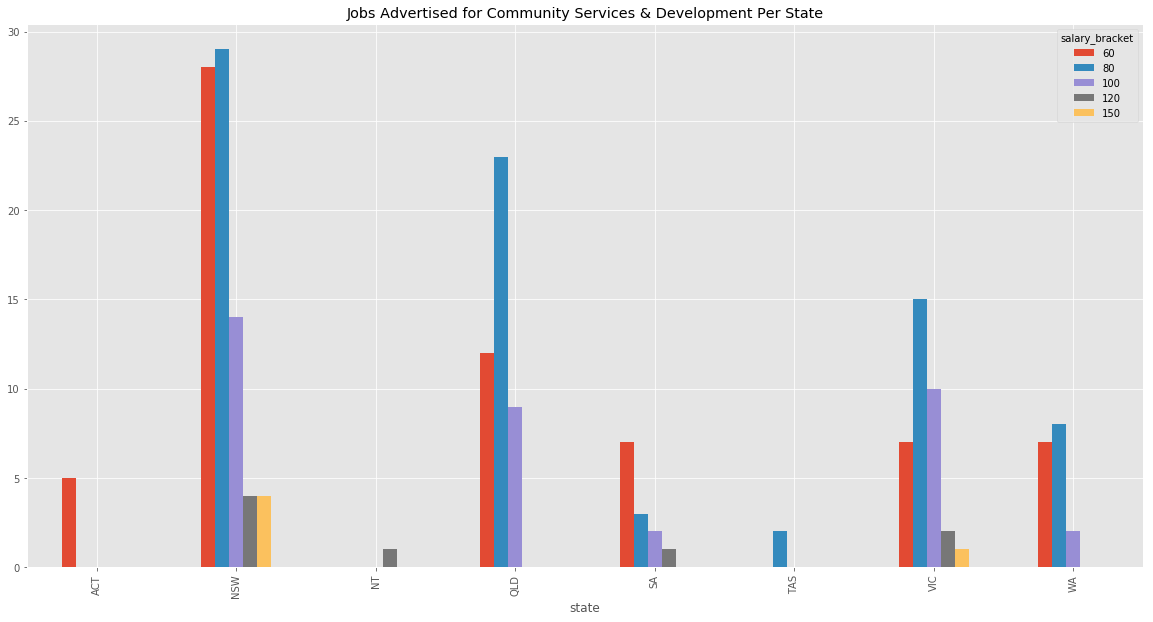

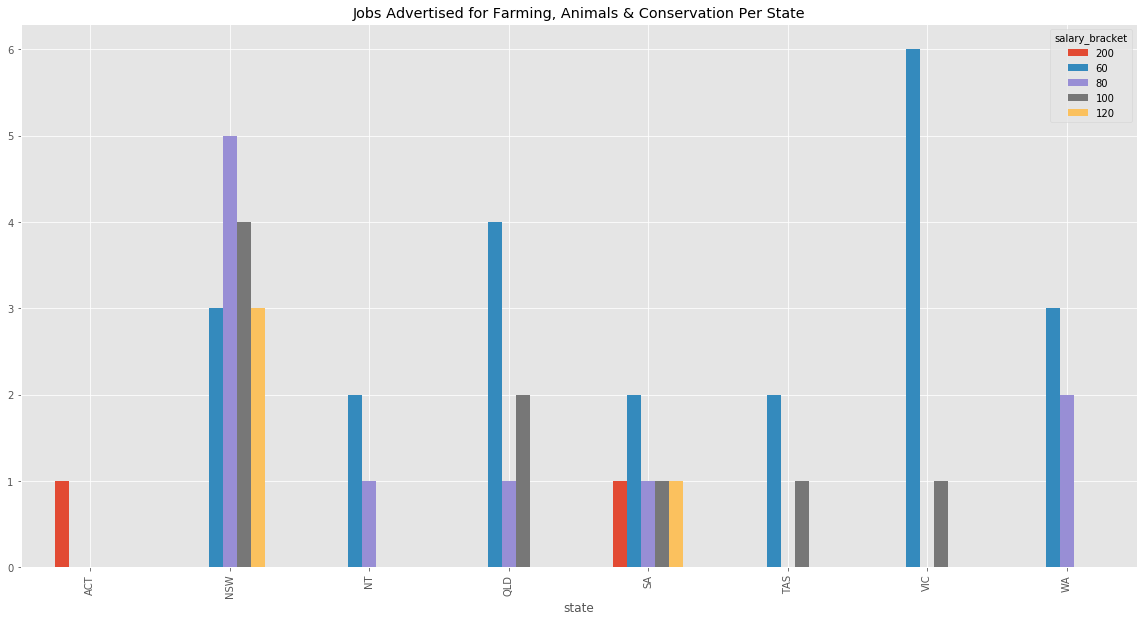

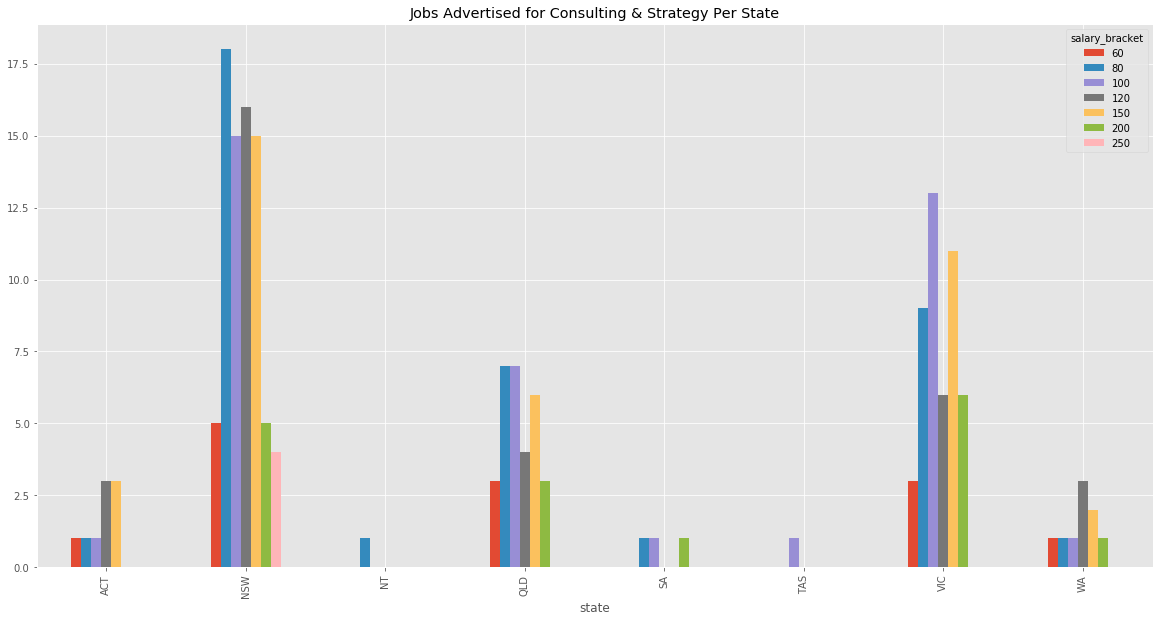

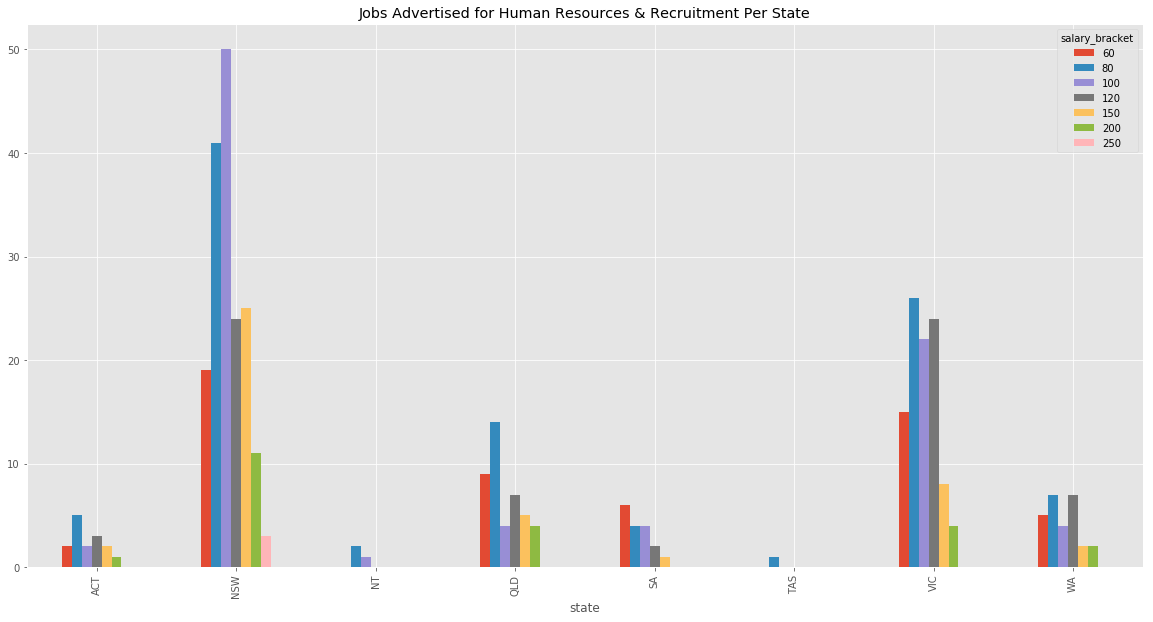

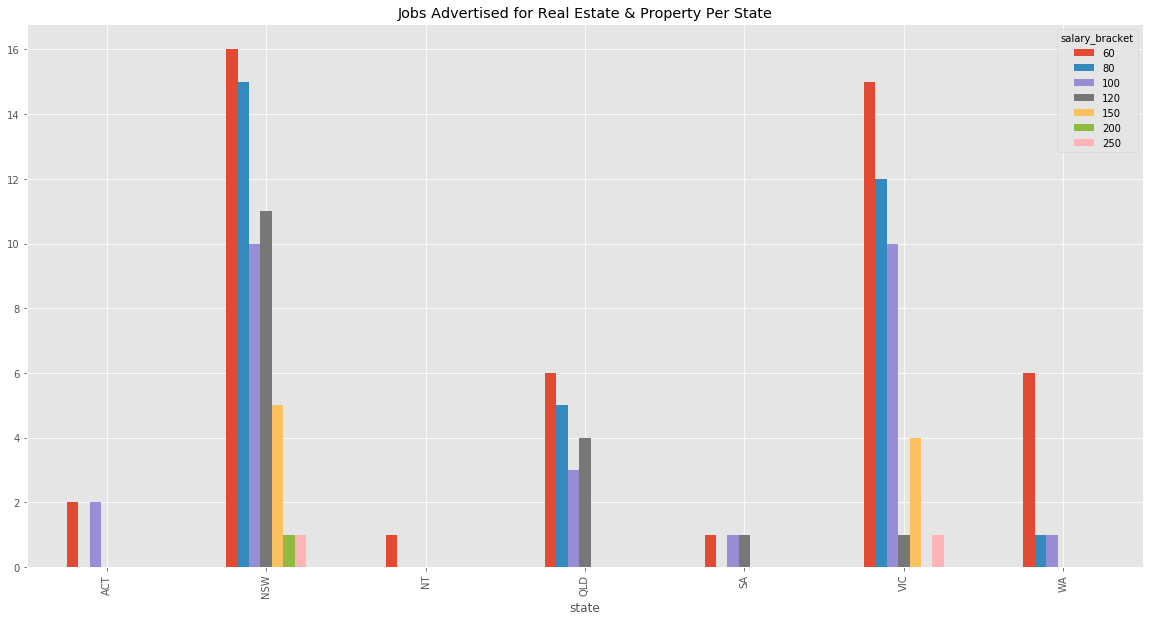

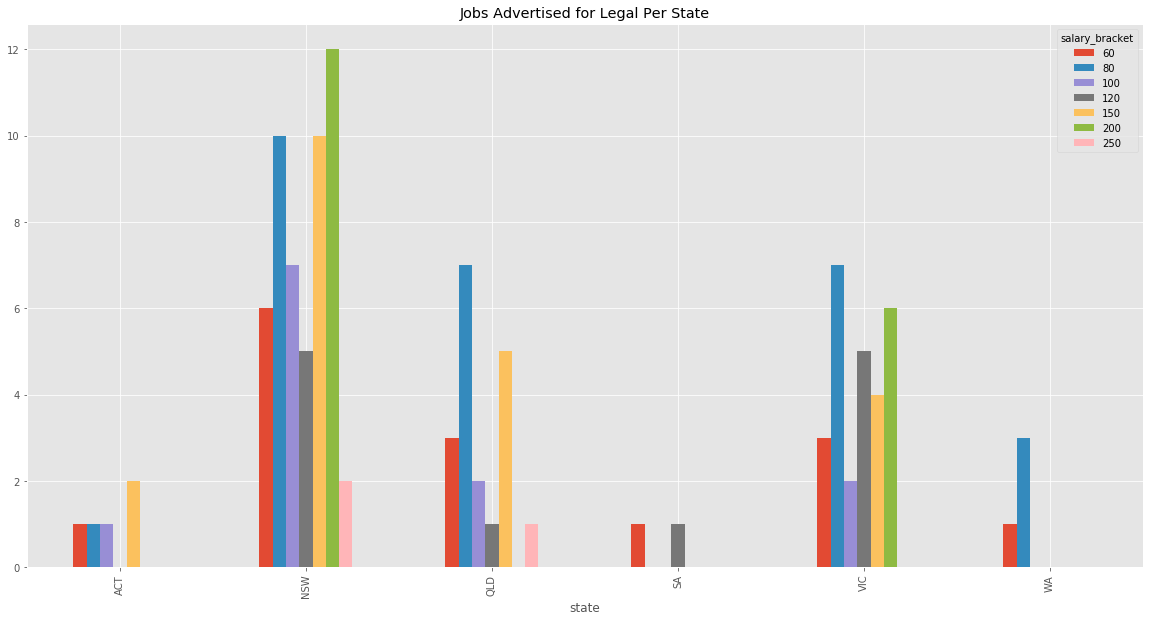

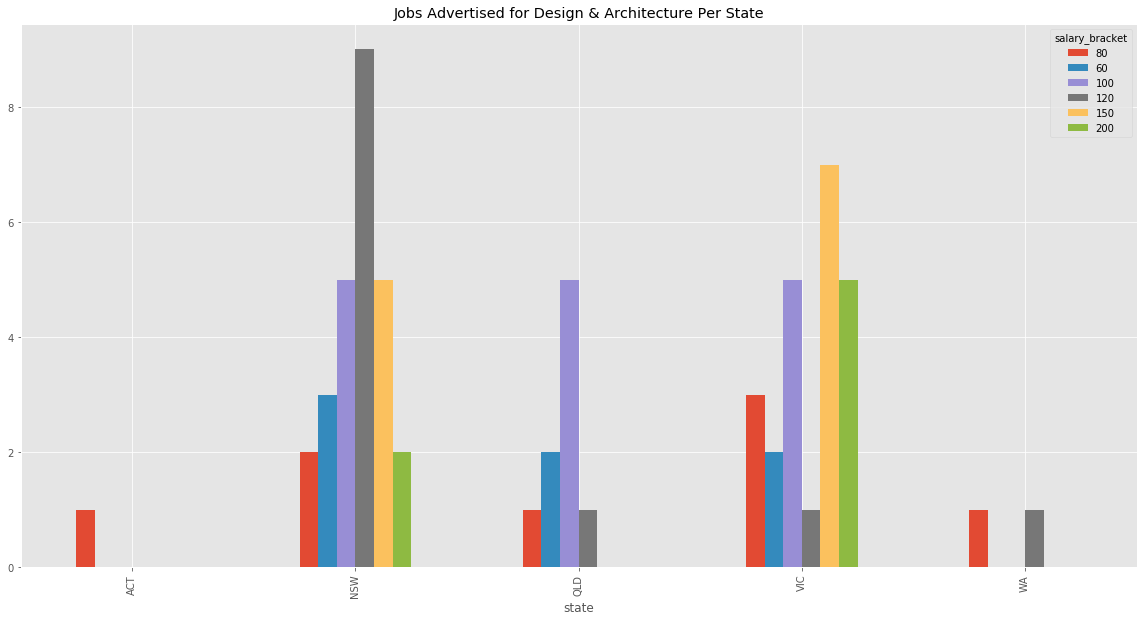

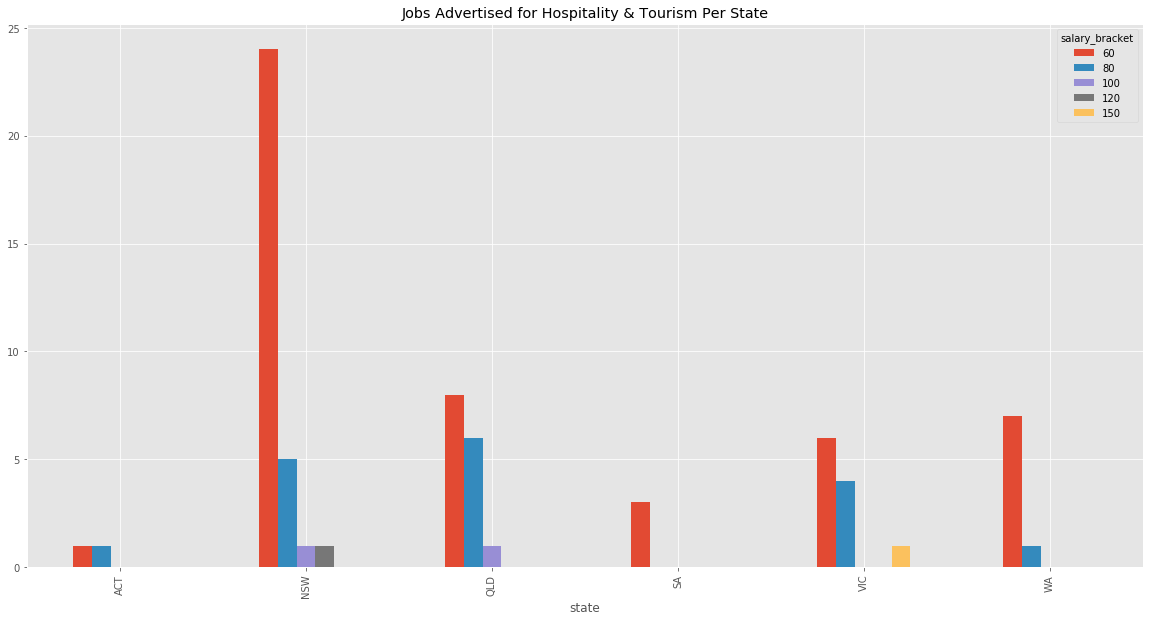

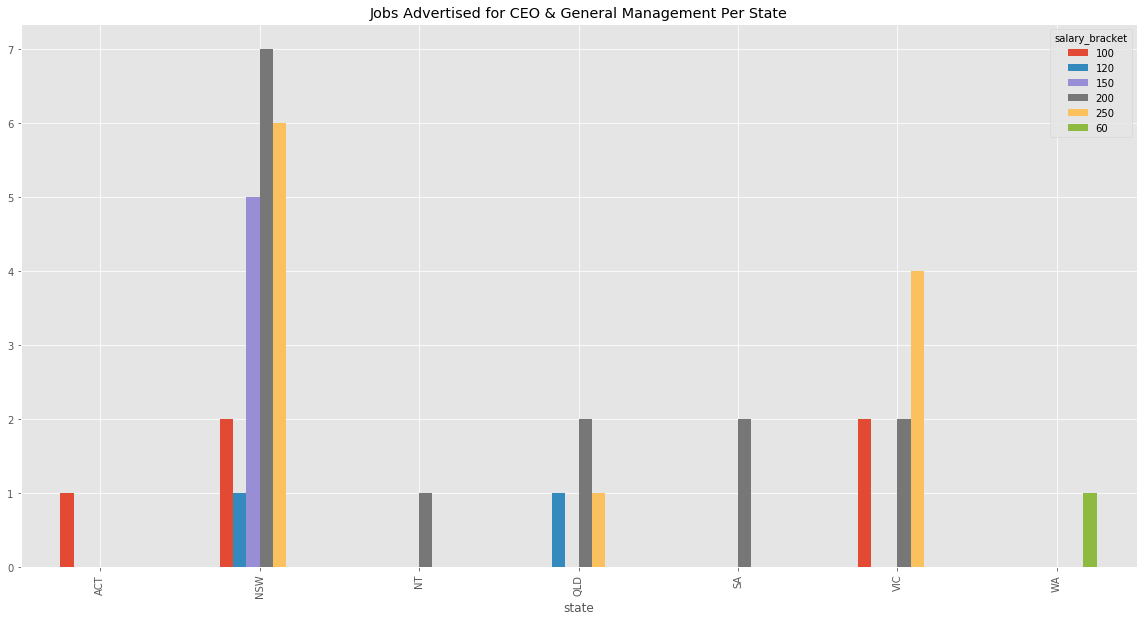

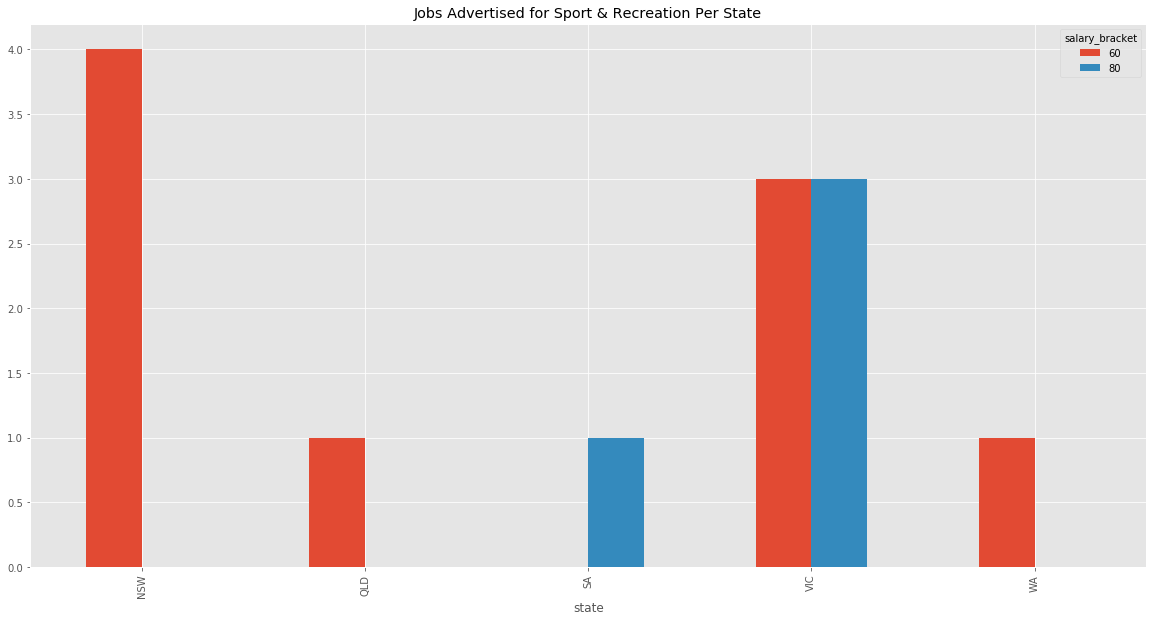

In [27]:
class_unique = salary['classification'].unique()
for c in class_unique:
    fig = job_state_by_category[:, c].unstack().plot(kind = 'bar', figsize=(20, 10))
    fig.set_title('Jobs Advertised for ' + c + ' Per State')

#### Observations based on no of jobs listing in each state for each salary bracket

* Health care seem to be higher paid in VIC than NSW
* Education both job listing and paid are higher in VIC than NSW
* Superrannuation jobs in NSW are highest 
* Government jobs listing seem to be higher than normal for ACT compare to other sectors
* Mining, Resources and Energy is highest when WA followed by QLD


> Overall NSW and VIC are the highest in jobs listing in most categories

> Except Mining which WA is the highest

In [28]:
salary['title']

0                                  Category Data Assistant
1                                       Data Administrator
2                                               Data Entry
3                          Accounts Assistant / Data Entry
4                                        Admin /Data Entry
5                Data Entry Clerk/Administrator - Payroll 
6                               Master Data Administrator 
7                    Customer Service - Data Fill Engineer
8                     IT Support Opportunity (Data Centre)
9                                         Data Coordinator
10       Data Entry Clerk / Administration Assistant - ...
11       Data Entry / Administration Clerk - IMMEDIATE ...
12                                     Junior Data Analyst
13           Graduate Consultant (Microsoft Data Insights)
14           Graduate Consultant (Microsoft Data Insights)
15                          Finance Systems & Data Analyst
16                                  SAP Data Entry Offic

# Data Preparations for Analysis

### Dummies categorical values

Text data such as classification and states are categorical data which are not numbers
Dummy these text cateogorical into numbers for data analysis

In [29]:
dummy = pd.get_dummies(salary, columns=['state'], prefix=['s'], drop_first=True)
dummy.head()

,title,classification,summary,salary_bracket,salary_high,s_NSW,s_NT,s_QLD,s_SA,s_TAS,s_VIC,s_WA
0,Category Data Assistant,Administration & Office Support,About Us TerryWhite Chemmart (TWCM) is Austral...,60,0,0,0,0,0,0,1,0
1,Data Administrator,Information & Communication Technology,About the business and the role This could be...,60,0,1,0,0,0,0,0,0
2,Data Entry,Administration & Office Support,Provide Data Entry support for a 4 week period...,60,0,0,0,0,0,0,0,1
3,Accounts Assistant / Data Entry,Administration & Office Support,About Perth Radiological Clinic Perth Radiolog...,60,0,0,0,0,0,0,0,1
4,Admin /Data Entry,Administration & Office Support,The Company This market leading company requi...,60,0,1,0,0,0,0,0,0


### Stemming

This technique is called stemming , it normalize words to a common root
Example:

* Science
* Sciences
* Scientist

common root word would be -> scien

In [30]:
from nltk.stem import PorterStemmer
import re

stemmer = PorterStemmer()

In [31]:
def stem_sentences(sentence):
    
    #sentence = sentence.replace("[^a-zA-Z\d\s.]", " ")    
    line = re.sub(r"[^a-zA-Z\d\s.]+", " ", str(sentence))
    tokens = line.replace(".", " ").split()
    stemmed_tokens = [stemmer.stem(token.strip()) for token in tokens]
    return ' '.join(stemmed_tokens)

#shorter version can also be used as written below
#dummy['titlesummary'].str.split().apply(lambda x: [stemmer.stem(y) for y in x])

In [32]:
# get the titlesummary column
dummy['title_stem'] = dummy['title'].apply(stem_sentences)
dummy['title_stem'].value_counts().head(10)

busi analyst            127
administr assist         98
data analyst             68
administr offic          65
data scientist           56
senior busi analyst      52
payrol offic             51
account payabl offic     49
custom servic offic      49
project manag            48
Name: title_stem, dtype: int64

In [33]:
# get the titlesummary column
dummy['summary_stem'] = dummy['summary'].apply(stem_sentences)
dummy['summary_stem'].head(10)

0    about Us terrywhit chemmart twcm is australia ...
1    about the busi and the role thi could be your ...
2    provid data entri support for a 4 week period ...
3    about perth radiolog clinic perth radiolog cli...
4    the compani thi market lead compani requir an ...
5    about tnttnt express a fedex compani is one of...
6    our client a lead privat own packag and resour...
7    posit custom servic data fill engin no to hire...
8    are you vibrant eager and enthusiast are you a...
9    opportun for an experienc data coordin to work...
Name: summary_stem, dtype: object

In [34]:
#dummy.drop(columns=['title', 'summary'], inplace=True)

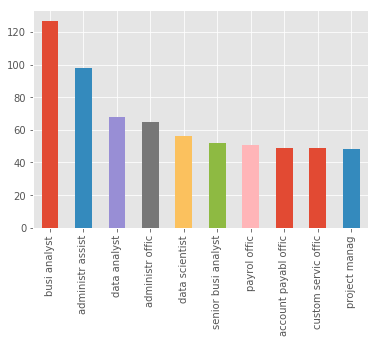

In [35]:
dummy['title_stem'].value_counts().head(10).plot(kind='bar')

In [36]:
dummy['stem'] = dummy['title_stem'] + ' '+ dummy['summary_stem']

In [37]:
dummy.head().T

,0,1,2,3,4
title,Category Data Assistant,Data Administrator,Data Entry,Accounts Assistant / Data Entry,Admin /Data Entry
classification,Administration & Office Support,Information & Communication Technology,Administration & Office Support,Administration & Office Support,Administration & Office Support
summary,About Us TerryWhite Chemmart (TWCM) is Austral...,About the business and the role This could be...,Provide Data Entry support for a 4 week period...,About Perth Radiological Clinic Perth Radiolog...,The Company This market leading company requi...
salary_bracket,60,60,60,60,60
salary_high,0,0,0,0,0
s_NSW,0,1,0,0,1
s_NT,0,0,0,0,0
s_QLD,0,0,0,0,0
s_SA,0,0,0,0,0
s_TAS,0,0,0,0,0


### Save Dummy File to CSV

Now files are ready to be analysized

In [38]:
# save file for data analysis
dummy.to_csv('./datasets/dummy_stem_no_category.csv')

In [39]:
dummy_class = pd.get_dummies(dummy, columns=['classification'], prefix=['c'], drop_first=True)
dummy_class.head()

,title,summary,salary_bracket,salary_high,s_NSW,s_NT,s_QLD,s_SA,s_TAS,s_VIC,...,c_Legal,"c_Manufacturing, Transport & Logistics",c_Marketing & Communications,"c_Mining, Resources & Energy",c_Real Estate & Property,c_Retail & Consumer Products,c_Sales,c_Science & Technology,c_Sport & Recreation,c_Trades & Services
0,Category Data Assistant,About Us TerryWhite Chemmart (TWCM) is Austral...,60,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Data Administrator,About the business and the role This could be...,60,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Data Entry,Provide Data Entry support for a 4 week period...,60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Accounts Assistant / Data Entry,About Perth Radiological Clinic Perth Radiolog...,60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Admin /Data Entry,The Company This market leading company requi...,60,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# save file for data analysis
dummy_class.to_csv('./datasets/dummy_stem.csv')